<a href="https://colab.research.google.com/github/Eduflores1497/Eventos-discretos/blob/main/Discretos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install simpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import simpy
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def llegadas():    #Generamos los tiempos de llegada de los clientes
 return np.random.exponential(1./5)

In [38]:
def generar_demanda():     #Generamos la demanda de los cliente
  return np.random.randint(1, 5)

In [41]:
def proceso_run(env,ordenar,max):    #Aquí se ejecuta el sistema
  global inventario, balance, ordenados   #Variables globales
  inventario=max #Iniciamos con el inventario lleno
  balance=0.0    #Ganancia inicial
  ordenados=0.0    #Número de piezas ordenadas para rellenar stock
  while True:
    llegada = llegadas()   #Generamos los tiempos de llegada de los clientes
    yield env.timeout(llegada)
    balance-= inventario*2*llegada  #Se generan costosf por día
    demanda = generar_demanda()   #Se genera la demanda de cada cliente
    if demanda < inventario:
       balance +=100*inventario  #Se generan ganancias por la demanda
       inventario-=demanda   #Se resta del inventario la cantidad vendida
       print('{:.2f} se vendió {}'.format(env.now, inventario))
    else:
      balance+=100*inventario
      inventario=0
      print('{:.2f} se vendió {} (sin existencias)'.format(env.now, inventario))
    if inventario < ordenar and ordenados == 0: # Si el inventario en existencia es menor que el inventario mínimo en existencia y no hay ninguna orden de productos pendientes por llegar
      env.process(pedidos(env, max)) #agregamos el proceso de ordenar un nuevo lote de productos al ambiente de #simulación.

def pedidos(env, max): # Proceso donde se pide un nuevo lote de productos.
  global inventario, balance, ordenados #variables globales declaradas anteriormente.
  ordenados= max - inventario # El número de productos a ordenar son los suficientes para volver a tener el  máximo.
  balance -= 50*ordenados # Se generan costos por el no. de productos ordenados.
  print('{:.2f} orden solicitada por {}'.format(env.now, ordenados)) # En qué momento se solicitaron tantos productos.
  yield env.timeout(2.0) # El proceso de ordenar más productos dura dos días, así que este se "pausa".
  inventario += ordenados # Los nuevos productos se agregan al conteo del inventario en existencia.
  ordenados = 0 # Ya no existen productos ordenados en espera.
  print('{:.2f} orden recibida, {} en inventario'.format(env.now, inventario)) # Cuánto se recibió y se tiene ahora (productos).


In [20]:
def observacion(env): # Proceso que registra el nivel de inventario en el tiempo.
  global inventario # Accedemos a la variable global "inventario" de las funciones anteriores.
  while True: # Creamos un ciclo infinito para recrear las observaciones.
    tiempos.append(env.now) # Lista donde almacenamos los tiempos donde se realizan las observaciones.
    nivel_inventario.append(inventario) # Lista donde almacenamos el nivel de inventario en el tiempo previamente almacenado.
    yield env.timeout(0.1) # Se registra una observación cada 0.1 días.

In [42]:
np.random.seed(0) # Declaramos una semilla específica para poder estudiar el sistema.
env = simpy.Environment() # Creamos el ambiente de simulación para Simpy.
env.process(proceso_run(env, 10, 30)) # Agregamos el proceso principal al ambiente de simulación conlos parámetros.
tiempos = [] # Creamos lista para registrar tiempos de cada observación.
nivel_inventario = [] # Creamos lista para registrar los niveles de inventario en las  observaciones.
env.process(observacion(env)) # Agregamos el proceso de observación al ambiente de simulación.
env.run(until = 5.0) # Ejecutamos el ambiente de simulación hasta el quinto día.

0.16 se vendió 28
0.53 se vendió 24
0.69 se vendió 22
0.88 se vendió 19
1.00 se vendió 16
1.01 se vendió 15
1.11 se vendió 12
1.44 se vendió 9
1.44 orden solicitada por 21
1.61 se vendió 7
1.97 se vendió 6
1.99 se vendió 2
2.08 se vendió 0 (sin existencias)
2.38 se vendió 0 (sin existencias)
2.79 se vendió 0 (sin existencias)
3.11 se vendió 0 (sin existencias)
3.26 se vendió 0 (sin existencias)
3.28 se vendió 0 (sin existencias)
3.44 orden recibida, 21 en inventario
3.46 se vendió 19
4.04 se vendió 15
4.06 se vendió 11
4.12 se vendió 7
4.12 orden solicitada por 23
4.39 se vendió 6
4.56 se vendió 5
4.63 se vendió 3
4.82 se vendió 2
4.92 se vendió 1


Text(0, 0.5, 'Número de inventario')

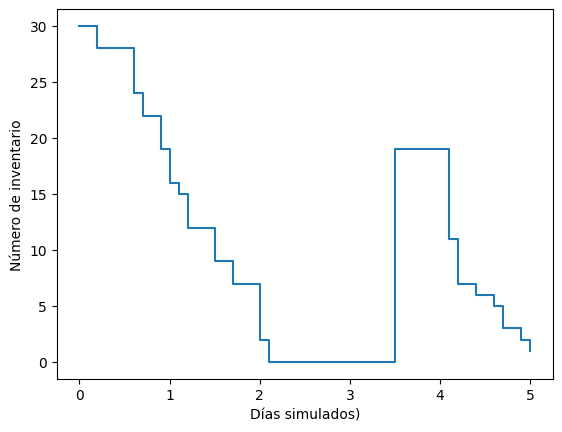

In [44]:
plt.figure() # Imprimimos las observaciones obtenidas.
plt.step(tiempos, nivel_inventario, where = 'post') #estudiados.
plt.xlabel('Días simulados)')
plt.ylabel('Número de inventario')